In [169]:
#Predicting a corporation closing stock price using LSTM
#using past 60 day stock price

In [170]:
#Libraries

import math
from pandas_datareader import data as web
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

In [171]:
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2019,12,17)

yf.pdr_override()
df = web.get_data_yahoo("GS", start_date, end_date)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,92.970001,96.430000,92.830002,95.360001,78.101082,8645200
2012-01-04,94.730003,95.129997,93.680000,94.739998,77.593285,7406200
2012-01-05,93.949997,95.800003,92.500000,94.580002,77.462234,8131300
2012-01-06,93.800003,93.959999,92.419998,93.419998,76.512192,5940900
2012-01-09,93.489998,95.110001,92.959999,94.690002,77.552322,5018200
...,...,...,...,...,...,...
2019-12-10,221.669998,222.880005,220.550003,221.880005,204.419434,1854100
2019-12-11,222.250000,222.850006,220.839996,221.190002,203.783722,1778600
2019-12-12,221.910004,226.779999,220.600006,226.050003,208.261246,2974300


In [172]:
df.shape

(2002, 6)

Text(0, 0.5, 'Close price')

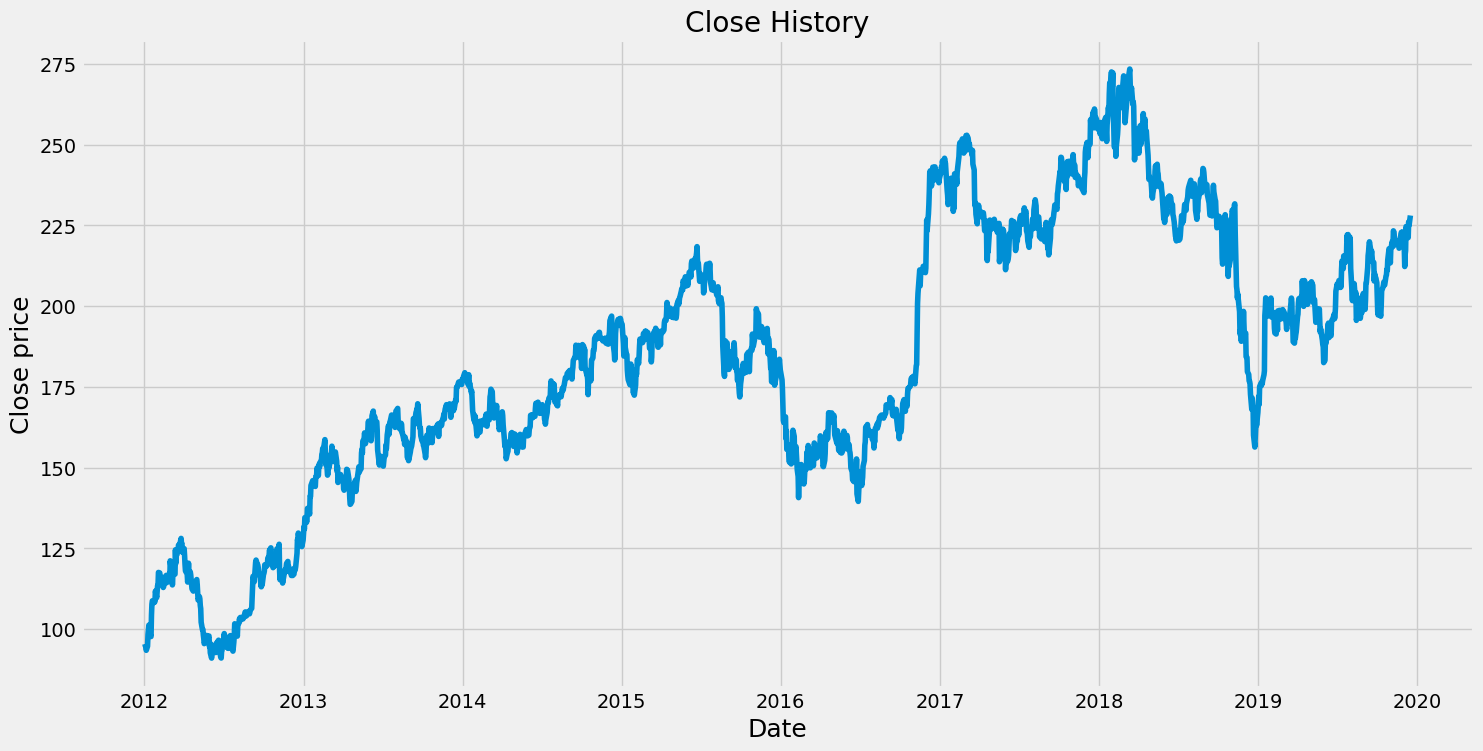

In [173]:
#closing price history
plt.figure(figsize=(16,8))
plt.title("Close History")

plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)

In [174]:
data = df.filter(['Close'])

dataset= data.values
training_data_len = math.ceil(len(dataset)* 0.8)

training_data_len

1602

In [175]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1)) #Creating the scaler from minmaxscaler
scaled_data = scaler.fit_transform(dataset) # applying the scaler to data set

scaled_data

array([[0.02390613],
       [0.02050662],
       [0.01962935],
       ...,
       [0.74048689],
       [0.73472967],
       [0.75139812]])

In [176]:
train_data = scaled_data[0:training_data_len]

#split into x train and y train

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0]) #dari 60 unit sebelum i ke i(excluded)
  y_train.append(train_data[i,0])   # data ke i (included)
  if i<61:
    print(x_train)
    print(y_train)
    print()


[array([0.02390613, 0.02050662, 0.01962935, 0.01326899, 0.02023249,
       0.04019082, 0.04803159, 0.05598201, 0.04364513, 0.03662682,
       0.07297948, 0.0914574 , 0.09726942, 0.09425377, 0.09798225,
       0.09469238, 0.09628247, 0.11388308, 0.10269768, 0.11223819,
       0.12309462, 0.12276565, 0.1454655 , 0.14469788, 0.13696679,
       0.1378989 , 0.13641845, 0.1267683 , 0.12901633, 0.11991448,
       0.12155937, 0.13016777, 0.13658298, 0.14053074, 0.12808422,
       0.13597984, 0.13636365, 0.13833755, 0.14316263, 0.132361  ,
       0.1652045 , 0.15878933, 0.15149686, 0.1243009 , 0.13926966,
       0.1434916 , 0.14414958, 0.14250465, 0.18390174, 0.16103741,
       0.1757868 , 0.17507402, 0.18258582, 0.19201664, 0.19185216,
       0.18499834, 0.19289395, 0.20325697, 0.19371642, 0.19388091])]
[0.17962496578109133]



In [177]:
#Convert xtrain y train to numpy

x_train = np.array(x_train)
y_train = np.array(y_train)


In [178]:
#Reshape the data

#LSTM wants 3D data in the form of samples, numper of time stamps, features

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))        #x_train = np.reshape(x_train,(1542,60,1))
x_train.shape



(1542, 60, 1)

In [179]:
#BUILDING THE MODEL


model = Sequential()

model.add(LSTM(150,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [180]:
#Compiling the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [181]:
#Train the model

model.fit(x_train, y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)



Epoch 1/30
93/93 [==============================] - 45s 365ms/step - loss: 0.0198 - val_loss: 0.0187
Epoch 2/30
93/93 [==============================] - 33s 361ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 3/30
93/93 [==============================] - 32s 347ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4/30
93/93 [==============================] - 31s 339ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 5/30
93/93 [==============================] - 32s 342ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 6/30
93/93 [==============================] - 32s 344ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 7/30
93/93 [==============================] - 32s 343ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 8/30
93/93 [==============================] - 32s 343ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 9/30
93/93 [==============================] - 33s 352ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 10/30
93/93 [==============================] - 34s 364ms/step - loss: 0.0018 - val_lo

In [182]:
#Create testing data set

#new array of scaled values from 1543 to 2003

test_data = scaled_data[training_data_len-60:2002]

#Create data sets

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [183]:
#Convert data to numpy arr

x_test = np.array(x_test)

In [184]:
#Reshape to LSTM

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [185]:
#Get predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 4s 168ms/step


In [186]:
#Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.7514490127563477

<ipython-input-187-5d6f283a2b72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


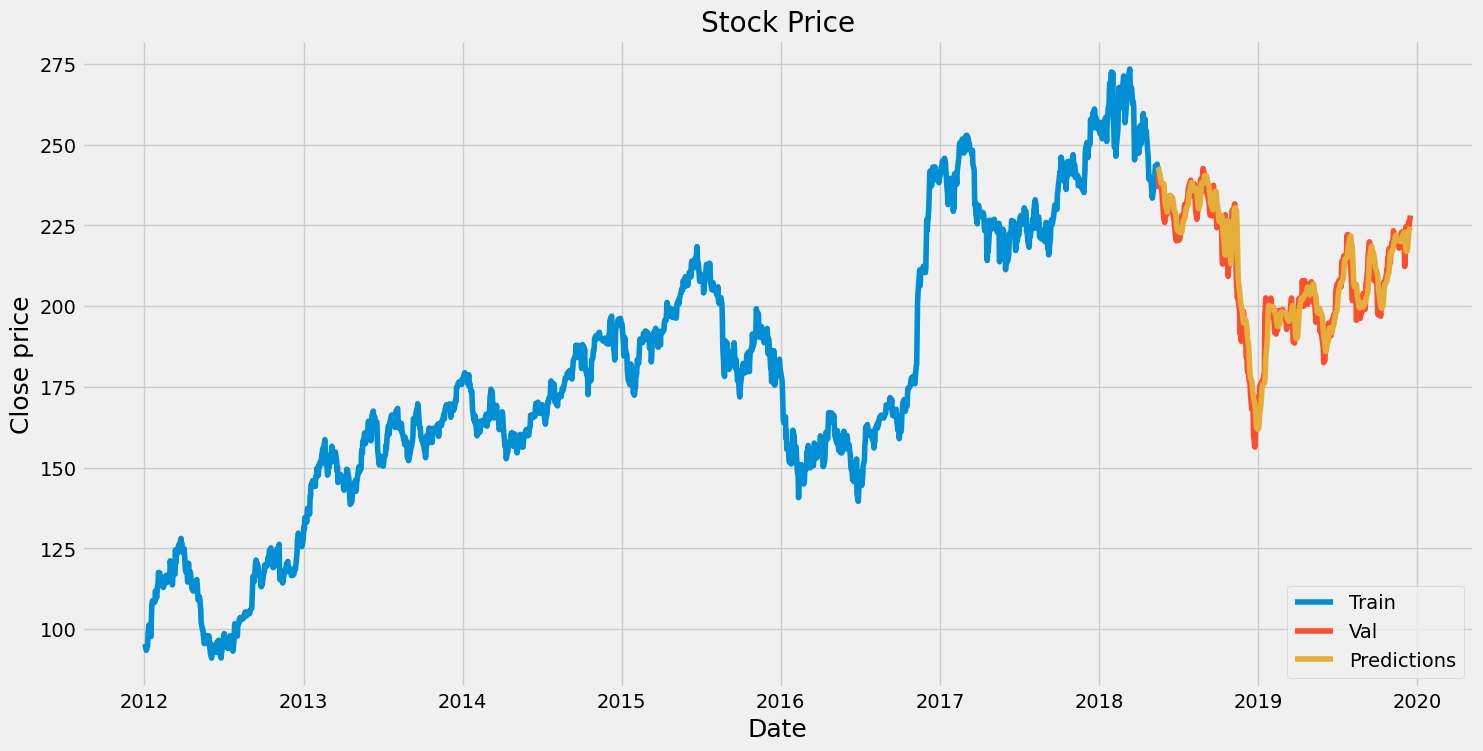

In [187]:
#Plotter

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

#Visualize

plt.figure(figsize=(16,8))
plt.title('Stock Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')

In [188]:
#Show the actual price vs predicted price

valid

,Close,Predictions
Date,,
2018-05-16,240.960007,243.077103
2018-05-17,239.100006,242.787201
2018-05-18,237.000000,241.809555
2018-05-21,237.699997,240.374680
2018-05-22,238.000000,239.017349
...,...,...
2019-12-10,221.880005,218.633469
2019-12-11,221.190002,220.721756
2019-12-12,226.050003,222.319077


In [189]:
#Check up or down
valid = np.array(valid)
valid = np.reshape(valid, (valid.shape[0], valid.shape[1],1))
valid.shape

(400, 2, 1)

In [192]:
# True -> Rising price
# False -> Decreasing price

original_close_dev = []
predicted_close_dev = []
for i in range(len(valid)-1):
  if( (valid[i][0]-valid[i+1][0])>0 ):
    original_close_dev.append(False)
  else :
    original_close_dev.append(True)

  if( (valid[i][1]-valid[i+1][1])>0 ):
    predicted_close_dev.append(False)
  else :
    predicted_close_dev.append(True)



In [193]:
#54% chance to get +/- each day correctly
plus_or_minus = 0

for i in range(len(original_close_dev)):
  if(original_close_dev[i]==predicted_close_dev[i]):
    plus_or_minus += 1
  else :
    continue

print(
  (plus_or_minus/len(original_close_dev))
)


0.543859649122807
